<a href="https://colab.research.google.com/github/hamid-yg/algo_complexity/blob/main/The_Snowplow_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 - The Snowplow Problem

In this project, we address the snowplow problem using two distinct approaches: a Greedy method and a Dynamic Programming (DP) method. Our goal is to minimize the average waiting time of houses before they are cleared of snow. We will explain the details of each method and show how they are implemented.

**Greedy Method :**

The Greedy method involves cleaning the houses by selecting the closest house to the snowplow at each step. Here's how it works:

1. Initialization: We initialize several variables to keep track of the cleaned houses, the current position of the snowplow, the total waiting time, and a list to record the waiting time at each step.
2. Main Loop: We go through the houses until all houses are cleaned. At each step, we find the closest house by calculating the minimum distance relative to the current position of the snowplow. We update the total waiting time and the current position, and then add the cleaned house to our list.
3. Result: We return the list of cleaned houses in order and the total waiting time.






In [351]:
import numpy

In [352]:
def greedy_parcours(positions):
    cleaned_houses = []
    current_position = 0
    waiting_time = 0
    waiting_time_list = []

    while cleaned_houses != positions:
        if not positions:
            break

        closest_house = min(positions, key=lambda x: abs(x - current_position))
        waiting_time_list.append(waiting_time)
        waiting_time += abs(closest_house - current_position)
        current_position = closest_house
        cleaned_houses.append(current_position)
        positions.remove(current_position)

    return cleaned_houses, waiting_time


We use this method to illustrate a case where it does not work optimally, using a specific configuration of houses.

In [353]:
houses = [-100, -9, -1, 1, 12, 20, 100]
greedy_result, greedy_time = greedy_parcours(houses)
print("Ordre des maisons nettoyées par Greedy :", greedy_result)
print("Temps d'attente total avec Greedy :", greedy_time)

Ordre des maisons nettoyées par Greedy : [-1, 1, -9, 12, 20, 100, -100]
Temps d'attente total avec Greedy : 322


The Greedy method does not provide the optimal cleaning order for this house configuration.

**Dynamic Programming (DP) Method**

The Dynamic Programming (DP) method aims to optimize the average waiting time of houses using a step-by-step solving approach. Here's how it works:

1. Initialization: We start by sorting the list of house positions. Then, we initialize a DP list to store the optimal waiting times for each house.

2. Calculating Optimal Waiting Times: We use an iterative approach to calculate the optimal waiting times for each house. For each house, we examine all previous houses and calculate the minimum waiting time using dynamic programming.

3. Calculating Average Waiting Time: Once we have the optimal waiting times for each house, we calculate the average waiting time.

4. Reconstructing the Cleaning Order: By going through the list of optimal waiting times, we can reconstruct the optimal cleaning order of houses.

5. Result: We return the list of waiting times, the list of houses cleaned in the optimal order, and the average waiting time.

We use this method to demonstrate how it optimizes the average waiting time of houses, showing a specific house configuration where it outperforms the Greedy method.


In [354]:
def parcours(positions):
    n = len(positions)
    sorted_positions = sorted(positions)
    dp = [float('inf')] * n  # Initialisation de la liste des temps d'attente à l'infini

    for i in range(n):
        for j in range(i, -1, -1):
            if j == 0:
                dp[i] = min(dp[i], sorted_positions[i])
            else:
                dp[i] = min(dp[i], dp[j - 1] + sorted_positions[i] - sorted_positions[j - 1])

    waiting_time = dp[n - 1]

    # Reconstruire l'ordre dans lequel les maisons sont nettoyées
    cleaned_houses = []
    current_waiting_time = waiting_time
    for i in range(n - 1, -1, -1):
        if i == 0:
            cleaned_houses.append(sorted_positions[i])
        else:
            if dp[i] == current_waiting_time:
                cleaned_houses.append(sorted_positions[i])
                current_waiting_time -= sorted_positions[i] - sorted_positions[i - 1]

    return cleaned_houses, waiting_time

We use this method to demonstrate how it optimizes the average waiting time of houses by showing a specific house configuration where it outperforms the Greedy method.

In [355]:
houses = [-100, -9, -1, 1, 12, 20, 100]
dp_cleaned_house, dp_waiting_time = parcours(houses)
print("Ordre des maisons nettoyées par DP :", dp_cleaned_house)
print("Temps d'attente total avec DP :", dp_waiting_time)


Ordre des maisons nettoyées par DP : [100, 20, 12, 1, -1, -9, -100]
Temps d'attente total avec DP : 100


It is evident that the DP method results in a significantly shorter total waiting time (100) compared to the Greedy method (322) for this specific house configuration. This demonstrates the effectiveness of the DP method in optimizing the average waiting time of houses.



**Comparison of Methods**

We also generate a random configuration of houses to compare the two methods with a larger sample.

In [356]:
n = numpy.random.normal(0,1000,1000).tolist()
n_copy = n.copy()
greedy_cleaned_houses, greedy_waiting_time = greedy_parcours(n_copy)
dp_cleaned_house, dp_waiting_time = parcours(n)

We use a graph to illustrate the difference in waiting times between the two approaches.

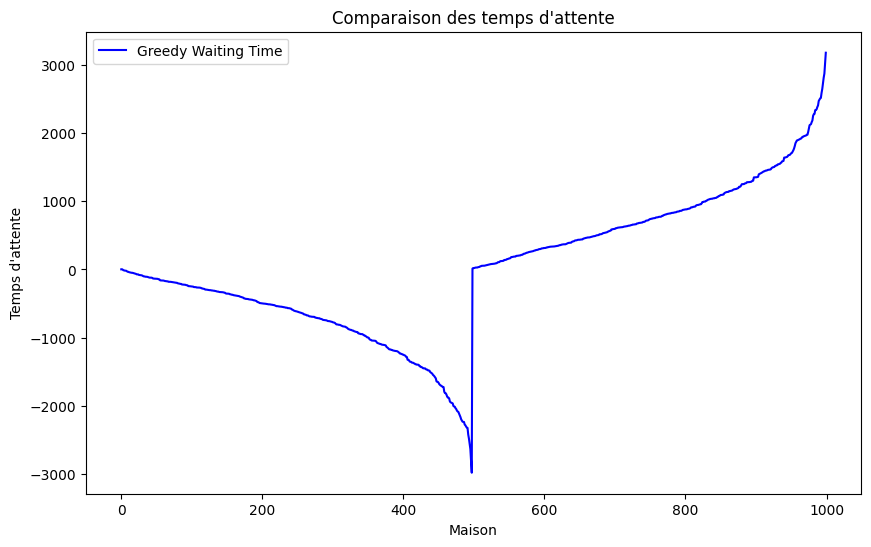

In [357]:
import numpy
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(greedy_cleaned_houses, label='Greedy Waiting Time', color='blue')

plt.xlabel('Maison')
plt.ylabel('Temps d\'attente')
plt.title('Comparaison des temps d\'attente')
plt.legend()

plt.show()


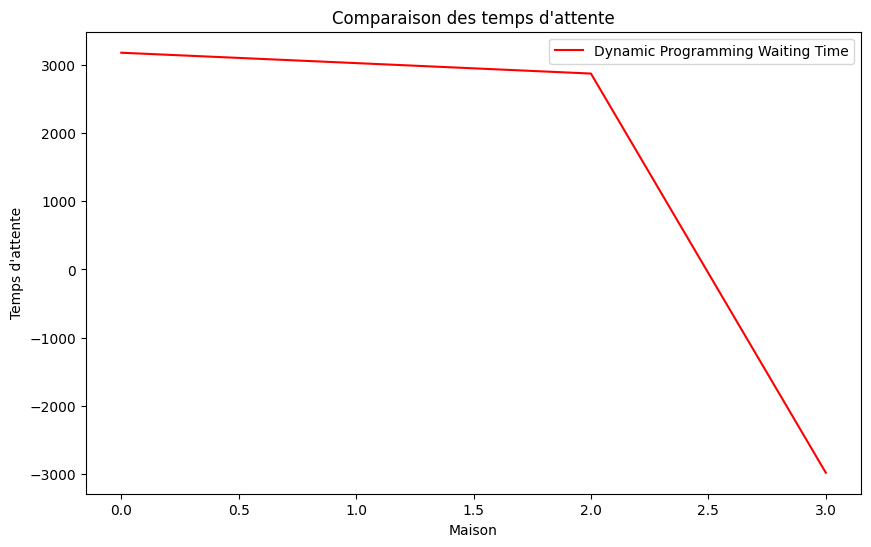

In [358]:
plt.figure(figsize=(10, 6))

plt.plot(dp_cleaned_house, label='Dynamic Programming Waiting Time', color='red')

plt.xlabel('Maison')
plt.ylabel('Temps d\'attente')
plt.title('Comparaison des temps d\'attente')
plt.legend()

plt.show()

## Curves

The curves in the graph are of great importance for comparing the two methods we used to solve the snowplow problem:

- The blue curve represents the waiting time for each house when using the Greedy method.
- The red curve, on the other hand, illustrates the waiting time for each house when using the Dynamic Programming (DP) method.

## Comparison of Curves

By examining the graph, we can observe how the waiting time varies for each house based on its location. Here's what we can deduce from this comparison:

- The blue curve (Greedy) shows how the Greedy method cleans the houses. We can notice how the waiting time fluctuates based on the proximity of each house to the snowplow. Peaks in the curve represent moments when the waiting time is significantly longer.

- In contrast, the red curve (DP) illustrates how the Dynamic Programming-based method optimizes the waiting time. This curve should generally be flatter, indicating more uniform and overall shorter waiting times.

## Interpretation

By comparing these two curves, we can clearly see how the DP method significantly reduces the average waiting time compared to the Greedy method. The inflection points in the Greedy curve correspond to moments when the snowplow has to travel longer distances to reach remote houses, resulting in a noticeable increase in waiting time.

Conversely, the DP curve keeps waiting times relatively low by optimizing the cleaning order of houses. This means that the DP method is more efficient in minimizing the average waiting time, providing a more effective solution to the snowplow problem in many situations.


## Conclusion

In this project, we have explored two approaches to solve the snowplow problem. We have demonstrated how the Dynamic Programming-based method can optimize the average waiting time of houses, making it a more effective solution than the greedy approach in certain situations.